In [1]:
import sys
import os
my_path = os.path.dirname(os.getcwd())  # '/home/ellismith/OlfactoryBulb'
sys.path.append(my_path)

from prev_ob_models.Birgiolas2020.fitting import *
from prev_ob_models.Birgiolas2020.isolated_cells import *
from prev_ob_models.Birgiolas2020.Mechanisms import *

import neuronunit
import neuronunit.tests.base
from neuron.units import mV, ms, µm
from neuron import h, gui, load_mechanisms
import plotly
import plotly.graph_objects as go

Import of eden.EdenBackend failed due to:
No module named 'eden_simulator'


--No graphics will be displayed.


In [2]:
# setup
h.cvode_active(0)
delay = 200
dur   = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 20   # can increase this value for better temporal resolution
h.dt = 1.0 / h.steps_per_ms

load_mechanisms("%s/prev_ob_models/Birgiolas2020/Mechanisms"%my_path)

True

In [3]:
# h.load_file('/home/ellismith/OlfactoryBulb/prev_ob_models/Birgiolas2020/Cells/GC1.hoc')
# h.init()
# h.topology()

In [4]:
def load_cell(my_cell):
    # choose a neuron and segment (my_cell = "GC2")
    neuron_path = "%s/prev_ob_models/Birgiolas2020/Cells/%s.hoc"% (my_path, my_cell)
    h.load_file(neuron_path)
    #getattr(h, my_cell)()    # to change cell name string to accessible attribute
    soma = getattr(h, my_cell)().soma

    #soma = h.psection()[0]

    #soma = h.Section(name="soma")
    #soma.L = soma.diam = 10 * µm
    #h.hh.insert(soma)

    for sec in h.allsec():
        print(sec)
        
    return h, soma

### Current clamp

- three key properties of a current clamp: amp – the amplitude (in nA), delay – the time the current clamp switches on (in ms), and dur – how long (in ms) the current clamp stays on. 
- current clamp: controlling injected current which flows into cell and then to ground
    - leakier cell is, the more current can flow (more channels open, low resistance)
- Granule cell models were injected 0.06, -0.02, and 0 nA. 
Simulation temperature was 35 oC

In [5]:
def run_iclamp(h, delay=100 * ms, dur=200 * ms):

    # current clamp 
    iclamp = h.IClamp(soma(0.5))
    iclamp.delay = delay
    iclamp.dur = dur

    # record time, voltage
    t = h.Vector().record(h._ref_t)
    v = h.Vector().record(soma(0.5)._ref_v)

    return iclamp, t, v

In [6]:
def plot_voltage(h, iclamp, t, v): 
  plt.figure()
  plt.figure(figsize=(8,6))

  for current in [-0.02, 0, 0.02, 0.06, 0.1]:
    iclamp.amp = current
    h.finitialize(-35 * mV)
    h.continuerun(400 * ms)
    plt.plot(t, v, label = "%s nA"%str(current))

  plt.legend()
  plt.xlabel("t (ms)")
  plt.ylabel("V (mV)")
  plt.title("Current clamp experiments for %s"%my_cell)
  plt.xlim(0, 400)
  plt.show()

In [7]:
my_cell = "GC1"
h, soma = load_cell(my_cell)


GC1[0].soma
GC1[0].apic[0]
GC1[0].apic[1]
GC1[0].apic[2]
GC1[0].apic[3]
GC1[0].apic[4]
GC1[0].apic[5]
GC1[0].apic[6]
GC1[0].apic[7]
GC1[0].apic[8]
GC1[0].apic[9]
GC1[0].apic[10]


In [11]:
getattr(h,my_cell)().soma


GC1[2].soma

In [10]:
temp = getattr(h,my_cell)()
temp.soma

GC1[1].soma

In [8]:
iclamp, t, v = run_iclamp(h)

plot_voltage(h, iclamp, t, v)

NEURON: n >= 0.
Assertion failed: file /home/conda/feedstock_root/build_artifacts/neuron_1616396372652/work/src/nrnoc/cabcode.c, line 1478
 near line 0
 ^
        IClamp(...)


RuntimeError: hoc error

In [10]:
#my_cell2 = "GC2"
#h, soma = load_cell(my_cell2)
#iclamp, t, v2 = run_iclamp(h)
#print(np.allclose(v1,v2))

In [ ]:
h.GC1()

GC1[0]

### Voltage clamp

In [ ]:
def run_vclamp(h):
    # voltage clamp 
    vclamp = h.VClamp(soma(0.5))
    vclamp.amp[0] = -65 * mV
    vclamp.dur[0] = 200 * ms
    #vclamp.amp[1] = 20 * mV
    vclamp.dur[1] = 300 * ms
    vclamp.amp[2] = -65 * mV
    vclamp.dur[2] = 100 * ms

    # record time, Na, K currents
    t = h.Vector().record(h._ref_t)
    ina = h.Vector().record(soma(0.5)._ref_ina)
    ik = h.Vector().record(soma(0.5)._ref_ik)

    return vclamp, t, ina, ik

In [ ]:
def plot_current(h, vclamp, t, ina, ik): 
  plt.figure()
  plt.figure(figsize=(8,6))

  for v in range(-80, 50, 10):
    vclamp.amp[1] = v
    h.finitialize(-65 * mV)
    h.continuerun(800 * ms)
    plt.plot(t, ik, label = "%s mV"%str(v))

  plt.legend()
  plt.xlabel("t (ms)")
  plt.ylabel("ik (mA/cm**2)")
  plt.title("Voltage clamp experiments for %s"%my_cell)
  plt.show()

<Figure size 432x288 with 0 Axes>

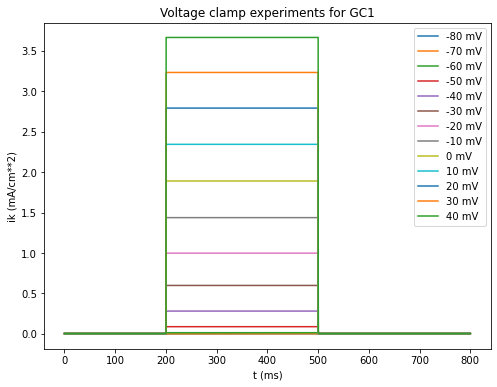

In [ ]:
vclamp, t, ina, ik = run_vclamp(h)
plot_current(h, vclamp, t, ina, ik)